In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_train[0]

6

In [37]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[6]

'frog'

In [15]:
def plt_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

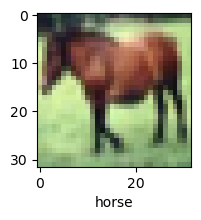

In [16]:
plt_sample(X_train,y_train,7)

In [17]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [18]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
ann.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 79ms/step - loss: 1.8106 - accuracy: 0.3571
Epoch 2/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.6195 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5390 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 121s 78ms/step - loss: 1.4810 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.4312 - accuracy: 0.4962


In [40]:
ann.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4849 - accuracy: 0.4691


[1.4849294424057007, 0.4690999984741211]

In [41]:
y_pred = ann.predict(X_test_scaled)

In [43]:
y_pred[50]

array([0.6903807 , 0.9411328 , 0.36371642, 0.29960746, 0.19576246,
       0.15147862, 0.0157136 , 0.5003    , 0.7290826 , 0.9934696 ],
      dtype=float32)

In [48]:
np.argmax(y_pred[50])

9

In [45]:
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes[50]

9

In [50]:
y_test[50][0]

9

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.55      0.50      0.53      1000
           1       0.40      0.82      0.53      1000
           2       0.36      0.38      0.37      1000
           3       0.34      0.39      0.37      1000
           4       0.49      0.28      0.35      1000
           5       0.42      0.31      0.36      1000
           6       0.49      0.57      0.53      1000
           7       0.70      0.42      0.52      1000
           8       0.59      0.57      0.58      1000
           9       0.55      0.44      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



#### Adding CNN layer

In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
cnn.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.9885 - accuracy: 0.2782
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6002 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4054 - accuracy: 0.4991
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2953 - accuracy: 0.5425
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2132 - accuracy: 0.5739


In [53]:
cnn.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3534 - accuracy: 0.5168


[1.3533779382705688, 0.5167999863624573]

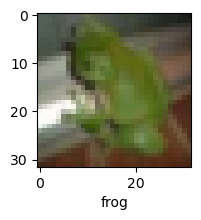

In [55]:
y_test=y_test.reshape(-1)
plt_sample(X_test,y_test,7)

In [65]:
y_predc = cnn.predict(X_test_scaled)

In [66]:
y_predc_classes = [np.argmax(i) for i in y_pred]

In [67]:
classes[y_predc_classes[7]]

'frog'

In [68]:
print(classification_report(y_test,y_predc_classes))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62      1000
           1       0.67      0.74      0.70      1000
           2       0.47      0.28      0.35      1000
           3       0.44      0.14      0.21      1000
           4       0.40      0.45      0.42      1000
           5       0.62      0.26      0.36      1000
           6       0.32      0.94      0.47      1000
           7       0.71      0.55      0.62      1000
           8       0.67      0.69      0.68      1000
           9       0.64      0.58      0.61      1000

    accuracy                           0.52     10000
   macro avg       0.56      0.52      0.50     10000
weighted avg       0.56      0.52      0.50     10000

